# Multiple Linear Regression
## Housing Case Study

#### Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —


- To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

- To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

- To know the accuracy of the model, i.e. how well these variables can predict house prices.

**So interpretation is important!**

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [2]:
df=pd.read_csv("Housing.csv")

In [3]:
df.shape

(545, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.describe(include='all')

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545,545,545,545,545,545.000000,545,545
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no,semi-furnished
freq,NaN,NaN,NaN,NaN,NaN,468,448,354,520,373,NaN,417,227
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,NaN,NaN,NaN,NaN,NaN,0.693578,NaN,NaN
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,NaN,NaN,NaN,NaN,NaN,0.861586,NaN,NaN
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


I see there is a lot of diff btw 75% of price and 75% of are and max values . so we will have to clean the dataset

In [6]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


We will have to convert categorical values to numerical values and also wee will convert furnishing status to numerical


In [7]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

So, we dont have any missing value here 

### Lets start working on the Visualization

Since, we need seaborn and matplotlib for this, lets add those import statements

<AxesSubplot:>

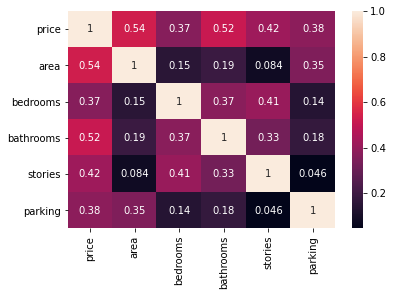

In [8]:
sns.heatmap(df.corr(),annot=True)

So, what we can infer from above is that- 

- Price and area, bedrooms,bathrooms,stories,parking are related
- area is also related to bedroom and bathroom and parking
- bedroom is also related to bathrooms, stories, parking
- bathrooms is related to stories and parking
- 

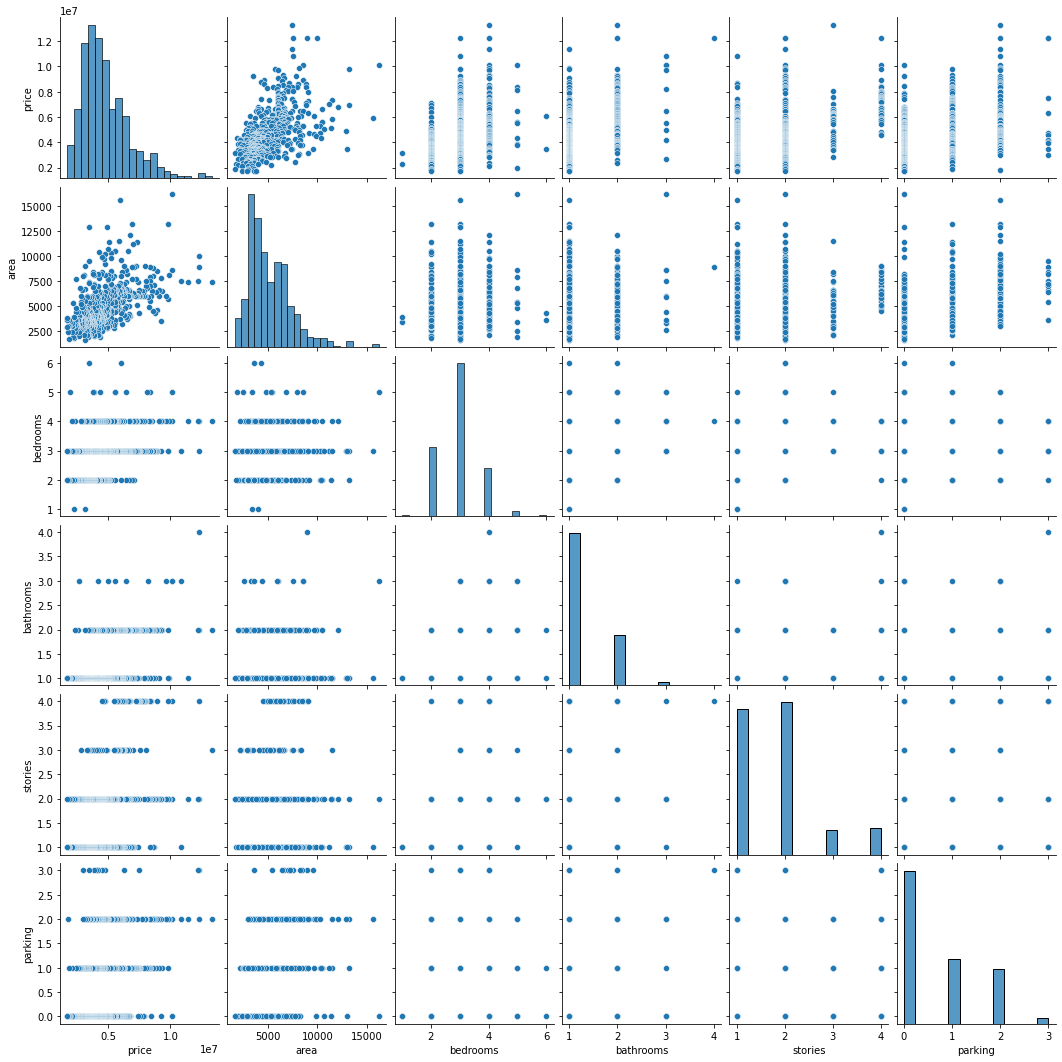

In [9]:
sns.pairplot(df)

What we can see from above is that there is a +ve relation between price and area,bedroom etc

### So, we have analysed all the numerical variables and now we need to analyse all the categorocal variables

<AxesSubplot:xlabel='mainroad', ylabel='price'>

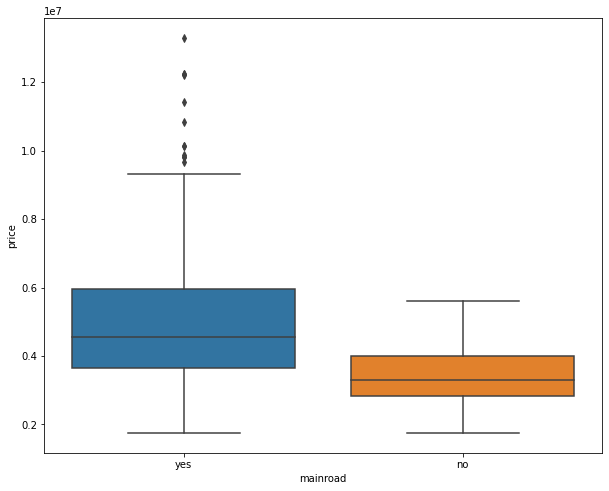

In [10]:
plt.figure(figsize=(10,8))
sns.boxplot(x='mainroad',y='price',data=df)

<AxesSubplot:xlabel='furnishingstatus', ylabel='price'>

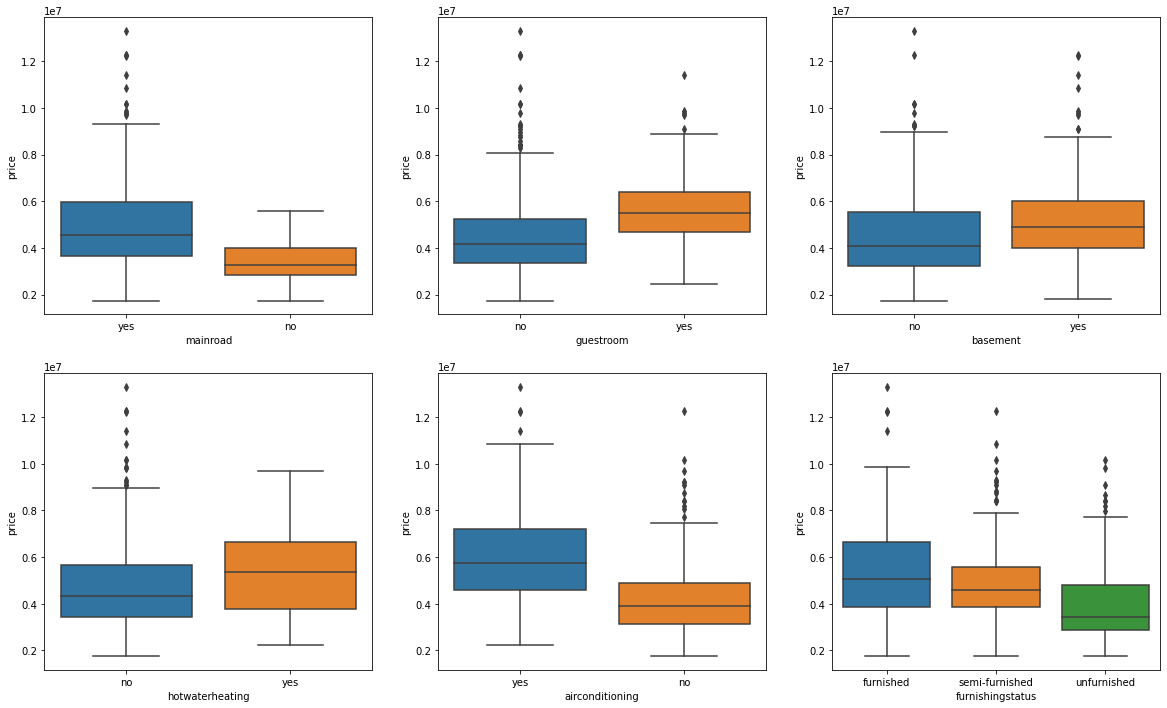

In [11]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x='mainroad',y='price',data=df)
plt.subplot(2,3,2)
sns.boxplot(x='guestroom',y='price',data=df)

plt.subplot(2,3,3)
sns.boxplot(x='basement',y='price',data=df)
plt.subplot(2,3,4)
sns.boxplot(x='hotwaterheating',y='price',data=df)

plt.subplot(2,3,5)
sns.boxplot(x='airconditioning',y='price',data=df)
plt.subplot(2,3,6)
sns.boxplot(x='furnishingstatus',y='price',data=df)

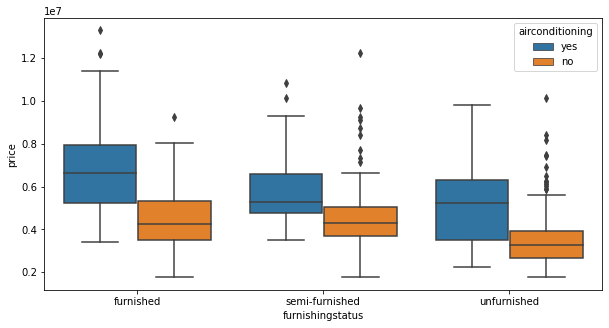

In [12]:
plt.figure(figsize=(10,5))
sns.boxplot(x='furnishingstatus',y='price',hue='airconditioning',data=df)
plt.show()

### Next thing is Data Preparation
- So, we will convert all the categorical variables to 1,0 and funishing status has three sublables. we need to work on that as well


In [13]:
df.mainroad=df.mainroad.apply(lambda x: 1 if x=='yes' else 0)

In [14]:
# yesy no variables - binary vars
varlist=['guestroom','basement','hotwaterheating','airconditioning','prefarea']

In [15]:
df[varlist]

,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,no,no,no,yes,yes
1,no,no,no,yes,no
2,no,yes,no,no,yes
3,no,yes,no,yes,yes
4,yes,yes,no,yes,no
...,...,...,...,...,...
540,no,yes,no,no,no
541,no,no,no,no,no
542,no,no,no,no,no
543,no,no,no,no,no


In [16]:
df[varlist]=df[varlist].apply(lambda x: x.map({'yes':1,'no':0}))

In [17]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [18]:
# # Reading the input

# # Storing the names in a variable 'name'
# name = ['Reetesh', 'Shruti', 'Kaustubh', 'Vikas', 'Mahima', 'Akshay']
# # Storing the responses in a variable 'repsonse'
# response = ['No', 'Maybe', 'yes', 'Yes', 'maybe', 'Yes']

# # Importing pandas and converting the read lists to a dataframe. You can print
# # the dataframe and run the code to see what it will look like
# import pandas as pd 
# df = pd.DataFrame({'Name': name,'Response': response})
# df.Response=df.Response.map({'yes':'1.0','Yes':'1.0','maybe':'0.5','Maybe':'0.5','No':'0.0','no':'0.0'})
# # Write your code here

# # Print the final DataFrame
# print(df)

## Dummy Variables



In [19]:
#creating dummy variables for dummy variables

In [20]:
status=pd.get_dummies(df.furnishingstatus)
status

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
540,0,0,1
541,0,1,0
542,0,0,1
543,1,0,0


What we can see here is - we can drop furnished , as following combination will help us in getting all teh required values

- 00 will correspond to 'furnished'
- 01 will correspond to `unfurnished`
- 10 will correspond to semi-furnished

In [21]:
#dropping redundant dummy variable
status= pd.get_dummies(df.furnishingstatus,drop_first=True)
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [22]:
df= pd.concat([df,status],axis=1)

In [23]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [24]:
df=df.drop('furnishingstatus',axis=1)

In [25]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


Now we will work on the splitting into train and test .
The we will look into re-scaling

## Splitty into train and test set

In [26]:
train,test=train_test_split(df,train_size=0.7,random_state=100)

In [27]:
train.shape

(381, 14)

In [28]:
test.shape

(164, 14)

## Rescaling

#### Normalization (Min-max scaling) - between 0 and 1

In [29]:
#normalization = (x-xmin)/(xmax-xmin) entire data is compressed between 0 and 1
#standardisation : (x- mu)/sigma

# fit() - learns xmin,xmax
# transform() - x-xmin/xmax-xmin

# fit_transform() - fit and transform



In [30]:
# 1. Create an object (instantiate)
scaler= MinMaxScaler()

#create a list off  numric variables
num_vars= ['area','bedrooms','bathrooms','stories','parking','price']

# 2. Fit on data

train[num_vars]=scaler.fit_transform(train[num_vars])

<ipython-input-30-e8bd26c0d107>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[num_vars]=scaler.fit_transform(train[num_vars])
C:\Users\anand\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [31]:
train

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,0.048485,0.118268,0.2,0.0,0.000000,1,0,0,0,0,0.000000,0,0,1
53,0.484848,0.291623,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,1,0
350,0.175758,0.139388,0.2,0.0,0.333333,1,0,0,1,0,0.333333,0,1,0
79,0.424242,0.366420,0.4,0.5,0.666667,1,1,0,0,1,0.000000,0,0,0


In [32]:
train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.260333,0.288710,0.386352,0.136483,0.268591,0.855643,0.170604,0.351706,0.052493,0.299213,0.242345,0.233596,0.414698,0.325459
std,0.157607,0.181420,0.147336,0.237325,0.295001,0.351913,0.376657,0.478131,0.223313,0.458515,0.285933,0.423674,0.493318,0.469162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151515,0.155227,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.221212,0.234424,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.345455,0.398099,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

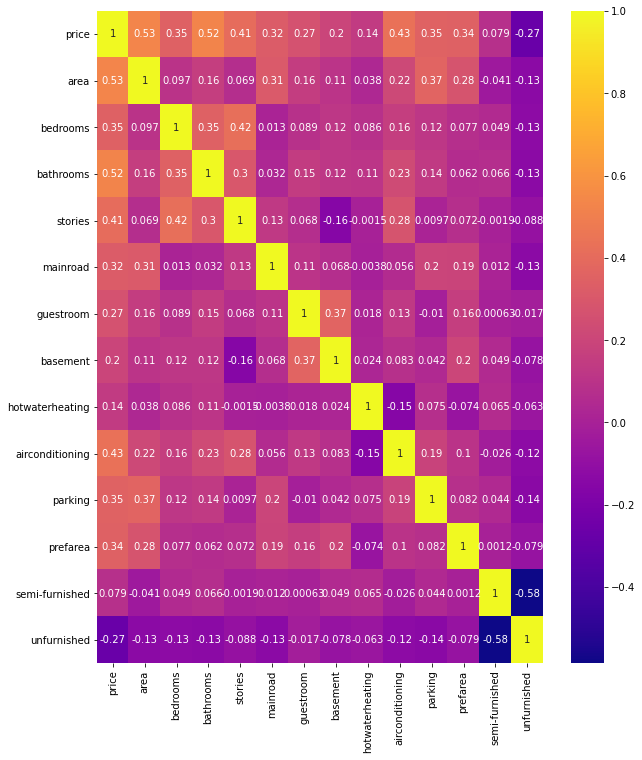

In [33]:
plt.figure(figsize=(10,12))
sns.heatmap(train.corr(),annot=True,cmap="plasma")

### MOdel creation

In [34]:

#Xtrain, y_train


In [35]:
y_train= train.pop('price')
X_train=train

In [36]:
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,0.118268,0.2,0.0,0.000000,1,0,0,0,0,0.000000,0,0,1
53,0.291623,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,1,0
350,0.139388,0.2,0.0,0.333333,1,0,0,1,0,0.333333,0,1,0
79,0.366420,0.4,0.5,0.666667,1,1,0,0,1,0.000000,0,0,0


In [37]:
y_train

359    0.169697
19     0.615152
159    0.321212
35     0.548133
28     0.575758
         ...   
526    0.048485
53     0.484848
350    0.175758
79     0.424242
520    0.060606
Name: price, Length: 381, dtype: float64

- statstical significance of variables
- VIF

In [38]:
X_train_sm=sm.add_constant(X_train.area)

In [39]:
X_train_sm

,const,area
359,1.0,0.155227
19,1.0,0.403379
159,1.0,0.115628
35,1.0,0.454417
28,1.0,0.538015
...,...,...
526,1.0,0.118268
53,1.0,0.291623
350,1.0,0.139388
79,1.0,0.366420


In [40]:
lr= sm.OLS(y_train,X_train_sm)

In [41]:
lr_model= lr.fit()

In [42]:
lr_model

In [43]:
lr_model.params

const    0.126894
area     0.462192
dtype: float64

In [44]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Wed, 27 Jan 2021   Prob (F-statistic):           3.15e-29
Time:                        11:29:48   Log-Likelihood:                 227.23
No. Observations:                 381   AIC:                            -450.5
Df Residuals:                     379   BIC:                            -442.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1269      0.013      9.853      0.000       0.102       0.152
area           0.4622      0.038     12.232      0.000       0.388       0.536
==============================================================================
Omnibus:                       67.313   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.063
Skew:                           0.925   Prob(JB):                     8.59e-32
Kurtosis:                       5.365   Cond. No.                         5.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

About 28% is explained by area

## Add another variable

since, Bathroom is next in correlation, we will take that 

In [45]:
X_train_sm= X_train[['area','bathrooms']]
print(X_train_sm)
X_train_sm= sm.add_constant(X_train_sm)
print(X_train_sm)

         area  bathrooms
359  0.155227        0.0
19   0.403379        0.5
159  0.115628        0.5
35   0.454417        0.5
28   0.538015        0.5
..        ...        ...
526  0.118268        0.0
53   0.291623        0.5
350  0.139388        0.0
79   0.366420        0.5
520  0.516015        0.0

[381 rows x 2 columns]
     const      area  bathrooms
359    1.0  0.155227        0.0
19     1.0  0.403379        0.5
159    1.0  0.115628        0.5
35     1.0  0.454417        0.5
28     1.0  0.538015        0.5
..     ...       ...        ...
526    1.0  0.118268        0.0
53     1.0  0.291623        0.5
350    1.0  0.139388        0.0
79     1.0  0.366420        0.5
520    1.0  0.516015        0.0

[381 rows x 3 columns]


In [46]:
lr = sm.OLS(y_train,X_train_sm)

In [47]:
lr_model=lr.fit()

In [48]:
lr_model.params


const        0.104589
area         0.398396
bathrooms    0.298374
dtype: float64

In [49]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     174.1
Date:                Wed, 27 Jan 2021   Prob (F-statistic):           2.51e-54
Time:                        11:29:49   Log-Likelihood:                 288.24
No. Observations:                 381   AIC:                            -570.5
Df Residuals:                     378   BIC:                            -558.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1046      0.011      9.384      0.000       0.083       0.127
area           0.3984      0.033     12.192      0.000       0.334       0.463
bathrooms      0.2984      0.025     11.945      0.000       0.249       0.347
==============================================================================
Omnibus:                       62.839   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.790
Skew:                           0.784   Prob(JB):                     2.23e-37
Kurtosis:                       5.859   Cond. No.                         6.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### This means that about 48% variance in price is explained by these two variables- area, bathrooms

### Add another variable- bedroom

In [50]:
X_train_sm= X_train[['area','bedrooms','bathrooms']]
X_train_sm= sm.add_constant(X_train_sm)

lr= sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()

lr_model.params

const        0.041352
area         0.392211
bedrooms     0.181863
bathrooms    0.259978
dtype: float64

In [51]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     128.2
Date:                Wed, 27 Jan 2021   Prob (F-statistic):           3.12e-57
Time:                        11:29:49   Log-Likelihood:                 297.76
No. Observations:                 381   AIC:                            -587.5
Df Residuals:                     377   BIC:                            -571.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0414      0.018      2.292      0.022       0.006       0.077
area           0.3922      0.032     12.279      0.000       0.329       0.455
bedrooms       0.1819      0.041      4.396      0.000       0.101       0.263
bathrooms      0.2600      0.026     10.033      0.000       0.209       0.311
==============================================================================
Omnibus:                       50.037   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.806
Skew:                           0.648   Prob(JB):                     7.92e-28
Kurtosis:                       5.487   Cond. No.                         8.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
X_train_sm= X_train[['area','bedrooms','bathrooms','stories']]
X_train_sm= sm.add_constant(X_train_sm)

lr= sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()

lr_model.params

const        0.046694
area         0.390871
bedrooms     0.089656
bathrooms    0.232997
stories      0.127895
dtype: float64

In [53]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     115.2
Date:                Wed, 27 Jan 2021   Prob (F-statistic):           5.09e-64
Time:                        11:29:49   Log-Likelihood:                 316.23
No. Observations:                 381   AIC:                            -622.5
Df Residuals:                     376   BIC:                            -602.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0467      0.017      2.710      0.007       0.013       0.081
area           0.3909      0.030     12.827      0.000       0.331       0.451
bedrooms       0.0897      0.042      2.125      0.034       0.007       0.173
bathrooms      0.2330      0.025      9.283      0.000       0.184       0.282
stories        0.1279      0.021      6.187      0.000       0.087       0.169
==============================================================================
Omnibus:                       65.663   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.324
Skew:                           0.794   Prob(JB):                     7.74e-42
Kurtosis:                       6.067   Cond. No.                         9.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
X_train_sm= X_train[['area','bedrooms','bathrooms','stories','airconditioning']]
X_train_sm= sm.add_constant(X_train_sm)

lr= sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()

print(lr_model.params)
print(lr_model.summary())

const              0.044255
area               0.359534
bedrooms           0.088821
bathrooms          0.215456
stories            0.103358
airconditioning    0.069494
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     106.2
Date:                Wed, 27 Jan 2021   Prob (F-statistic):           1.30e-69
Time:                        11:29:49   Log-Likelihood:                 331.89
No. Observations:                 381   AIC:                            -651.8
Df Residuals:                     375   BIC:                            -628.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef 

Initailly we started with oen variable and then completed till 5 . 

### Now we will see - Adding All Variables to Model

In [55]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished'],
      dtype='object')

In [56]:
# build a model with all variables

In [57]:
X_train_sm= sm.add_constant(train)
X_train_sm

,const,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,1.0,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,1.0,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,1.0,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,1.0,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,1.0,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,0.118268,0.2,0.0,0.000000,1,0,0,0,0,0.000000,0,0,1
53,1.0,0.291623,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,1,0
350,1.0,0.139388,0.2,0.0,0.333333,1,0,0,1,0,0.333333,0,1,0
79,1.0,0.366420,0.4,0.5,0.666667,1,1,0,0,1,0.000000,0,0,0


In [58]:
lr= sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()

In [59]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Wed, 27 Jan 2021   Prob (F-statistic):           8.83e-83
Time:                        11:29:49   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0200      0.021      0.955      0.340      -0.021       0.061
area                0.2347      0.030      7.795      0.000       0.175       0.294
bedrooms            0.0467      0.037      1.267      0.206      -0.026       0.119
bathrooms           0.1908      0.022      8.679      0.000       0.148       0.234
stories             0.1085      0.019      5.661      0.000       0.071       0.146
mainroad            0.0504      0.014      3.520      0.000       0.022       0.079
guestroom           0.0304      0.014      2.233      0.026       0.004       0.057
basement            0.0216      0.011      1.943      0.053      -0.000       0.043
hotwaterheating     0.0849      0.022      3.934      0.000       0.042       0.127
airconditioning     0.0669      0.011      5.899      0.000       0.045       0.089
parking             0.0607      0.018      3.365      0.001       0.025       0.096
prefarea            0.0594      0.012      5.040      0.000       0.036       0.083
semi-furnished      0.0009      0.012      0.078      0.938      -0.022       0.024
unfurnished        -0.0310      0.013     -2.440      0.015      -0.056      -0.006
==============================================================================
Omnibus:                       93.687   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.917
Skew:                           1.091   Prob(JB):                     6.14e-67
Kurtosis:                       6.801   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
# significance (p-values)
# VIF - Variance Inflation Factor


## VIF 

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [62]:
vif= pd.DataFrame()
vif['Features'] = train.columns

In [63]:
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]


In [64]:
vif

,Features,VIF
0,area,4.672431
1,bedrooms,7.334390
2,bathrooms,1.666512
3,stories,2.701092
4,mainroad,6.021774
5,guestroom,1.469106
6,basement,2.015022
7,hotwaterheating,1.135860
8,airconditioning,1.770847
9,parking,2.122672


In [65]:
vif['VIF']= round(vif['VIF'],2)
vif= vif.sort_values(by= "VIF", ascending=False)

In [66]:
vif

,Features,VIF
1,bedrooms,7.33
4,mainroad,6.02
0,area,4.67
3,stories,2.70
11,semi-furnished,2.19
9,parking,2.12
6,basement,2.02
12,unfurnished,1.82
8,airconditioning,1.77
2,bathrooms,1.67


### we want to stick with VIF <5

so, we can drop semifurnished becoz of high p -Val and bedroomns and mainroad becoz of high VIF

### We will remove High p, low VIF first and the remove low p, high VIF

In [67]:
X=X_train.drop('semi-furnished',axis=1)

In [68]:
X_train_sm= sm.add_constant(X)
lr= sm.OLS(y_train,X_train_sm)
lr_model= lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     65.61
Date:                Wed, 27 Jan 2021   Prob (F-statistic):           1.07e-83
Time:                        11:29:49   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -737.6
Df Residuals:                     368   BIC:                            -686.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0207      0.019      1.098      0.273      -0.016       0.058
area                0.2344      0.030      7.845      0.000       0.176       0.293
bedrooms            0.0467      0.037      1.268      0.206      -0.026       0.119
bathrooms           0.1909      0.022      8.697      0.000       0.148       0.234
stories             0.1085      0.019      5.669      0.000       0.071       0.146
mainroad            0.0504      0.014      3.524      0.000       0.022       0.079
guestroom           0.0304      0.014      2.238      0.026       0.004       0.057
basement            0.0216      0.011      1.946      0.052      -0.000       0.043
hotwaterheating     0.0849      0.022      3.941      0.000       0.043       0.127
airconditioning     0.0668      0.011      5.923      0.000       0.045       0.089
parking             0.0608      0.018      3.372      0.001       0.025       0.096
prefarea            0.0594      0.012      5.046      0.000       0.036       0.083
unfurnished        -0.0316      0.010     -3.096      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       93.538   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.844
Skew:                           1.090   Prob(JB):                     1.05e-66
Kurtosis:                       6.794   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
vif= pd.DataFrame()
vif['Features']= X.columns
vif['VIF']= [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

vif['VIF']= round(vif['VIF'],2)

In [70]:
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
1,bedrooms,6.59
4,mainroad,5.68
0,area,4.67
3,stories,2.69
9,parking,2.12
6,basement,2.01
8,airconditioning,1.77
2,bathrooms,1.67
10,prefarea,1.51
5,guestroom,1.47


In [71]:
X=X_train.drop('semi-furnished',axis=1)
X=X.drop('bedrooms',axis=1)

In [72]:
X_train_sm= sm.add_constant(X)
lr= sm.OLS(y_train,X_train_sm)
lr_model= lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Wed, 27 Jan 2021   Prob (F-statistic):           2.73e-84
Time:                        11:29:49   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0357      0.015      2.421      0.016       0.007       0.065
area                0.2347      0.030      7.851      0.000       0.176       0.294
bathrooms           0.1965      0.022      9.132      0.000       0.154       0.239
stories             0.1178      0.018      6.654      0.000       0.083       0.153
mainroad            0.0488      0.014      3.423      0.001       0.021       0.077
guestroom           0.0301      0.014      2.211      0.028       0.003       0.057
basement            0.0239      0.011      2.183      0.030       0.002       0.045
hotwaterheating     0.0864      0.022      4.014      0.000       0.044       0.129
airconditioning     0.0665      0.011      5.895      0.000       0.044       0.089
parking             0.0629      0.018      3.501      0.001       0.028       0.098
prefarea            0.0596      0.012      5.061      0.000       0.036       0.083
unfurnished        -0.0323      0.010     -3.169      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       97.661   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.388
Skew:                           1.130   Prob(JB):                     2.20e-71
Kurtosis:                       6.923   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
vif= pd.DataFrame()
vif['Features']= X.columns
vif['VIF']= [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

vif['VIF']= round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,mainroad,4.79
0,area,4.55
2,stories,2.23
8,parking,2.10
5,basement,1.87
7,airconditioning,1.76
1,bathrooms,1.61
9,prefarea,1.50
4,guestroom,1.46
10,unfurnished,1.33


In [74]:
y_train_pred= lr_model.predict(X_train_sm)

In [75]:
y_train_pred

359    0.109599
19     0.463835
159    0.330450
35     0.515631
28     0.468225
         ...   
526    0.079966
53     0.477416
350    0.263852
79     0.443907
520    0.173336
Length: 381, dtype: float64

In [76]:
res= y_train-y_train_pred

C:\Users\anand\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

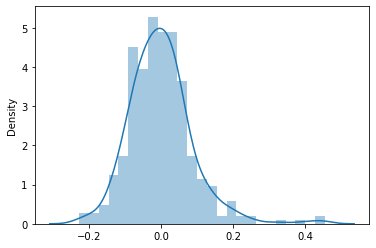

In [77]:
sns.distplot(res)

### Prediction and evaluation on test_set

In [78]:
#You fit only training dataset

In [79]:
test[num_vars]= scaler.transform(test[num_vars])
test

<ipython-input-79-df7a7def1742>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[num_vars]= scaler.transform(test[num_vars])
C:\Users\anand\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,0.229697,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,0.484848,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,0.303030,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,0.242424,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,0.227879,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.145455,0.010032,0.4,0.5,0.333333,1,0,1,0,0,0.000000,1,0,1
191,0.284848,0.780007,0.4,0.0,0.333333,1,1,1,0,0,0.000000,0,1,0
310,0.206061,0.365100,0.4,0.0,0.000000,1,0,1,0,0,0.000000,0,1,0
46,0.500000,0.366420,0.4,0.5,1.000000,1,0,0,0,1,0.333333,0,0,0


In [80]:
test.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.263176,0.298548,0.408537,0.158537,0.268293,0.865854,0.195122,0.347561,0.030488,0.353659,0.205285,0.237805,0.420732,0.329268
std,0.172077,0.211922,0.147537,0.281081,0.276007,0.341853,0.397508,0.477654,0.172452,0.479569,0.289322,0.427043,0.495189,0.471387
min,0.006061,-0.016367,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142424,0.148011,0.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.226061,0.259724,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.346970,0.397439,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,0.909091,1.263992,0.800000,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [81]:
y_test= test.pop('price')
X_test=test

In [88]:
X_test_sm= sm.add_constant(X_test)

In [89]:
X_test_sm

,const,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,1.0,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,1.0,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,1.0,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,1.0,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,1.0,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1.0,0.010032,0.4,0.5,0.333333,1,0,1,0,0,0.000000,1,0,1
191,1.0,0.780007,0.4,0.0,0.333333,1,1,1,0,0,0.000000,0,1,0
310,1.0,0.365100,0.4,0.0,0.000000,1,0,1,0,0,0.000000,0,1,0
46,1.0,0.366420,0.4,0.5,1.000000,1,0,0,0,1,0.333333,0,0,0


In [90]:
X_test_sm = X_test_sm.drop(['bedrooms','semi-furnished'],axis=1)

In [91]:
y_test_pred=lr_model.predict(X_test_sm)

In [93]:
r2_score(y_test,y_test_pred)

0.6713505684480789